In [55]:
import numpy as np
from matplotlib import pyplot as plt
from C8_file import secant_method

### Infinite Square Well

In [56]:
N = 1001
def eigenfunction(n, a):
    x_values = np.linspace(-a, a, N)
    if n % 2 == 0:
        return np.sqrt(1/a)*np.sin(n*np.pi*x_values/(2*a))
    return np.sqrt(1/a)*np.cos(n*np.pi*x_values/(2*a))

def prob_density(n, a):
    return np.abs(eigenfunction(n, a))**2

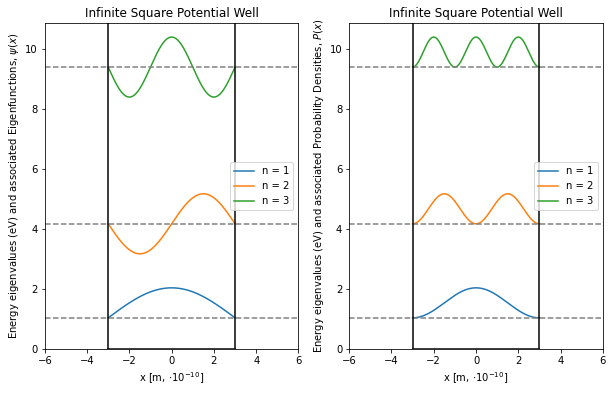

In [107]:
# First three energy levels for an electron trapped inside an infinite 1D potential well:
a = 3e-10
m = 9.109e-31
h_bar = 6.626e-34/(2*np.pi)
x_values = np.linspace(-a, a, N)

E1 = h_bar**2*np.pi**2/(8*m*a**2)/1.602e-19
E2 = 4*h_bar**2*np.pi**2/(8*m*a**2)/1.602e-19
E3 = 9*h_bar**2*np.pi**2/(8*m*a**2)/1.602e-19

psi_values_1 = eigenfunction(1, a)
psi_values_2 = eigenfunction(2, a)
psi_values_3 = eigenfunction(3, a)

prob_values_1 = prob_density(1, a)
prob_values_2 = prob_density(2, a)
prob_values_3 = prob_density(3, a)

fig = plt.figure(figsize=(10,6))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

ax1.plot(x_values/1e-10, np.sqrt(a)*psi_values_1+E1)
ax1.plot(x_values/1e-10, np.sqrt(a)*psi_values_2+E2)
ax1.plot(x_values/1e-10, np.sqrt(a)*psi_values_3+E3)

ax1.set_xlim([-6, 6])
ax1.set_ylim(0)
ax1.axhline(E1, linestyle='--', color='grey')
ax1.axhline(E2, linestyle='--', color='grey')
ax1.axhline(E3, linestyle='--', color='grey')
ax1.axvline(-a/1e-10, color='black')
ax1.axvline(a/1e-10, color='black')
ax1.axhline(0, 0.25, 0.75, color='black')
ax1.legend(['n = 1', 'n = 2', 'n = 3'])
ax1.set_xlabel('x [m, $\cdot 10^{-10}$]')
ax1.set_ylabel('Energy eigenvalues (eV) and associated Eigenfunctions, $\psi(x)$')

ax2.plot(x_values/1e-10, a*prob_values_1+E1)
ax2.plot(x_values/1e-10, a*prob_values_2+E2)
ax2.plot(x_values/1e-10, a*prob_values_3+E3)

ax2.set_xlim([-6, 6])
ax2.set_ylim(0)
ax2.axhline(0, 0.25, 0.75, color='black')
ax2.axhline(E1, linestyle='--', color='grey')
ax2.axhline(E2, linestyle='--', color='grey')
ax2.axhline(E3, linestyle='--', color='grey')
ax2.axvline(-a/1e-10, color='black')
ax2.axvline(a/1e-10, color='black')
ax2.legend(['n = 1', 'n = 2', 'n = 3'])
ax2.set_xlabel('x [m, $\cdot 10^{-10}$]')
ax2.set_ylabel('Energy eigenvalues (eV) and associated Probability Densities, $P(x)$')

ax1.set_title('Infinite Square Potential Well')
ax2.set_title('Infinite Square Potential Well')
plt.show()

### Numerical approach

In [58]:
def dpsi_dx(psi, tau, x, E):
    return tau
def dtau_dx(psi, tau, x, E):
    return -2*m*E*psi/(h_bar**2)

def solve(E):
    dx = 2*a/(N-1)
    x_values = np.linspace(-a, a, N)
    psi, tau = np.zeros(N), np.zeros(N)
    psi[0], tau[0] = 0, 1

    for i in range(N-1):
        psi[i + 1] = psi[i] + dpsi_dx(psi[i], tau[i], x_values[i + 1], E) * dx
        tau[i + 1] = tau[i] + dtau_dx(psi[i], tau[i], x_values[i + 1], E) * dx
    return psi[-1]

print(f"E = {round(secant_method(0, 1.602e-19, 1e-5, solve)/1.602e-19, 2)} eV for the eigenvalue with starting values of 0 eV and 1 eV in the secant method.")
print("By solving the problem analitically, this is found to be the energy value for the ground state solution.")

E = 1.02 eV for the eigenvalue with starting values of 0 eV and 1 eV in the secant method.
By solving the problem analitically, this is found to be the energy value for the ground state solution.


### Finite Square Well

In [115]:
N = 1001
V_0 = 10*1.602e-19
def eigenfunction_finite(n, a, E):
    alpha = np.sqrt(2*m*E)/h_bar
    beta = np.sqrt(2*m*(V_0-E))/h_bar
    if n % 2 == 0:
        # Using normalisation and boundary conditions
        B = np.sqrt(0.5/(np.exp(-2*a*beta)/(2*beta)-(np.exp(-2*beta*alpha)*(np.cos(alpha*a)-1))/(alpha*(np.sin(-alpha*a))**2)))
        A = np.exp(-beta*a)/np.sin(-alpha*a)*B
    else:
        B = np.sqrt(1/(np.exp(-2*a*beta)/beta+(np.sin(2*alpha*a)+2*alpha*a)*np.exp(-2*beta*a)/(2*alpha*(np.cos(alpha*a))**2)))
        A = B*np.exp(-beta*a)/np.cos(alpha*a)

    x_values = np.linspace(-2*a, 2*a, N)
    psi_values = np.zeros(N)
    for i, x in enumerate(x_values):
        if x <= -a:
            if n % 2 == 0:
                psi_values[i] = -B*np.exp(beta*x)
            else:
                psi_values[i] = B*np.exp(beta*x)
        if -a < x < a:
            if n % 2 == 0:
                psi_values[i] = A*np.sin(alpha*x)
            else:
                psi_values[i] = A*np.cos(alpha*x)
        if x >= a:
            psi_values[i] = B*np.exp(-beta*x)
    return psi_values

def prob_density_finite(n, a, E):
    return np.abs(eigenfunction_finite(n, a, E))**2

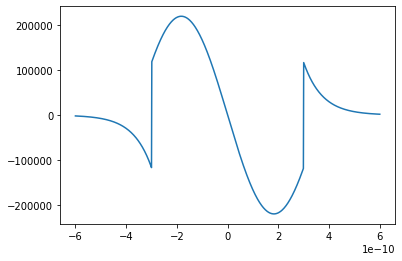

In [117]:
x_values = np.linspace(-2*a, 2*a, N)

E1 = 0.7155*1.602e-19
E2 = 2.8216*1.602e-19
E3 = 6.1492*1.602e-19

psi_values_1 = eigenfunction_finite(2, a, E2)

plt.plot(x_values, psi_values_1)

plt.show()